# Predictive Modeling Example

## Step 1: Import the libraries we will use in this notebook

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

np.random.seed(1) # set this to ensure the results are repeatable. 

## Step 2: Load the given data that we will model

In [2]:
df = pd.read_csv('C:/Users/surya/OneDrive/Documents/USF/Classes/Semester-2/DSP/Week-2 Codes/RidingMowers.csv')

df.head(3)

,Income,Lot_Size,Ownership
0,60.0,18.4,Owner
1,85.5,16.8,Owner
2,64.8,21.6,Owner


Seperate out the input m(X) and the target (y)

In [3]:
X=df[['Income', 'Lot_Size']]
y=df[['Ownership']]

For educational purposes, let's look at the first five values in X and y (note how X is an array of lists)

## Step 3: Explore the given data

Often we will do much more than this, but at least look at things using a scatterplot

Text(0, 0.5, 'Lot Size (000s sqft)')

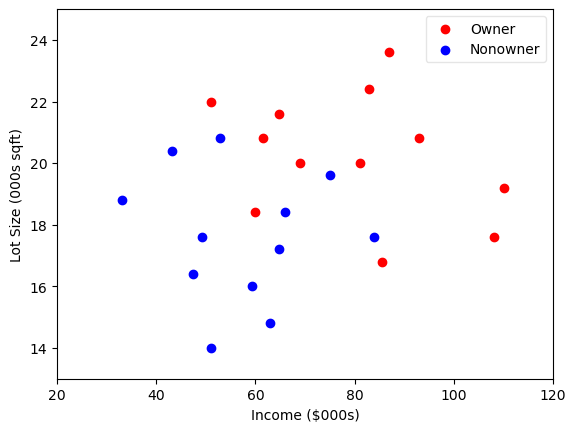

In [4]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(df.loc[df.Ownership=='Owner']['Income'], 
           df.loc[df.Ownership=='Owner']['Lot_Size'], 
           marker='o', 
           color='red')
ax.scatter(df.loc[df.Ownership=='Nonowner']['Income'], 
           df.loc[df.Ownership=='Nonowner']['Lot_Size'], 
           marker='o', 
           color='blue')

ax.legend(["Owner", "Nonowner"], framealpha=0.5)
                                         
ax.set_xlim(20, 120)
ax.set_ylim(13, 25)
ax.set_xlabel('Income ($000s)')
ax.set_ylabel('Lot Size (000s sqft)')

## Step 4: Fit the model

Fit the linear regression model to the dataset

In [5]:
lin_reg=LogisticRegression()
_ = lin_reg.fit(X,np.ravel(y))

# OR, we could combine the two lines above to one as follows...
#lin_reg = LinearRegression().fit(X,y)

In [6]:
df['Prediction'] = lin_reg.predict(X)

## Step 5: Analyze the linear regression model's performance

Visualize the linear regression model results

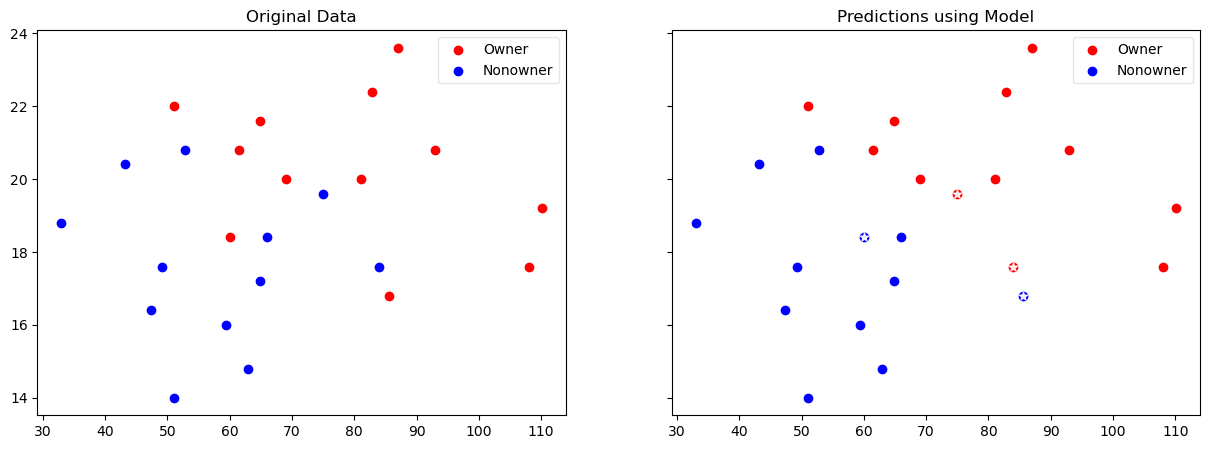

In [7]:
#fig, (ax1, ax2) = plt.subplots(2)
#fig.suptitle('testing')
#df.loc[df.Prediction=='Owner'].plot(x='Income', y='Lot_Size', style='o', 
#                                                   markerfacecolor='C0', markeredgecolor='C0',
#                                                   ax=ax)
#df.loc[df.Prediction=='Nonowner'].plot(x='Income', y='Lot_Size', style='o',
#                                                      markerfacecolor='none', markeredgecolor='C1',
#                                                      ax=ax)
#ax.legend(["Owner", "Nonowner"], framealpha=0.5)
#ax.set_xlim(20, 120)
#ax.set_ylim(13, 25)
#ax.set_xlabel('Income ($000s)')
#ax.set_ylabel('Lot Size (000s sqft)')
             
             
#plt.figure(figsize=(10,6))

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5), sharey=True)

ax1.title.set_text('Original Data')
ax1.scatter(df.loc[df.Ownership=='Owner']['Income'], 
           df.loc[df.Ownership=='Owner']['Lot_Size'], 
           marker='o', 
           color='red')
ax1.scatter(df.loc[df.Ownership=='Nonowner']['Income'], 
           df.loc[df.Ownership=='Nonowner']['Lot_Size'], 
           marker='o', 
           color='blue')

ax1.legend(["Owner", "Nonowner"], framealpha=0.5)

ax2.title.set_text('Predictions using Model')
ax2.scatter(df.loc[df.Prediction=='Owner']['Income'], 
           df.loc[df.Prediction=='Owner']['Lot_Size'], 
           marker='o', 
           color='red')
ax2.scatter(df.loc[df.Prediction=='Nonowner']['Income'], 
           df.loc[df.Prediction=='Nonowner']['Lot_Size'], 
           marker='o', 
           color='blue')

ax2.scatter(df.loc[df.Prediction!=df.Ownership]['Income'], 
           df.loc[df.Prediction!=df.Ownership]['Lot_Size'], 
           marker='*', 
           color='white',
           alpha=0.9)
ax2.legend(["Owner", "Nonowner"], framealpha=0.5)


In [8]:
b0 = lin_reg.intercept_[0]
b1 = lin_reg.coef_[0][0]
r2 = lin_reg.score(X, y)

... using fstring formatting, we can display these values as follows...

In [9]:
print(f"Y = {b0:.2f} + {b1:.2f}x")
print(f"R^2: {lin_reg.score(X, y):.3f}") 
# for more on fstrings see here...
# https://www.freecodecamp.org/news/python-f-strings-tutorial-how-to-use-f-strings-for-string-formatting/

Y = -22.33 + 0.10x
R^2: 0.833


## NOTE: R^2 is not a good measure of performance for a classifier!

Later, we will introduce the confursion matrix. The confusion matrix (and measures derived from this matrix) are a much better means of evaluating the performance of a classifer.